In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
import matplotlib.pyplot as plt
import torch
from rlaopt.solvers import PCGConfig, SAPConfig, SAPAccelConfig
from rlaopt.preconditioners import NystromConfig
from rlaopt.kernels import KernelConfig
from scalable_gp_inference.bayes_opt.configs import BayesOptConfig, TSConfig
from scalable_gp_inference.bayes_opt.core import BayesOpt

In [3]:
device = torch.device("cuda:1")
dtype = torch.float32
seed = 0

noise_variance = 1e-6
lengthscale = 0.5
pcg_iters = 10
num_blocks = 5
kernel_type = "matern32"
n_steps = 6

In [4]:
torch.set_default_dtype(dtype)
torch.manual_seed(seed)

In [5]:
kernel_config = KernelConfig(const_scaling=1.0, lengthscale=lengthscale)

In [6]:
precond_config = NystromConfig(rank=100, rho=noise_variance)

In [7]:
bayes_config = BayesOptConfig(kernel_config=kernel_config, kernel_type=kernel_type, noise_variance=noise_variance)

In [8]:
ts_config = TSConfig()

In [9]:
opt = BayesOpt(bayes_config, device=device, dtype=dtype)

In [10]:
opt.bo_state

BayesOptState(X=tensor([[0.3990, 0.5167, 0.0249,  ..., 0.7967, 0.4150, 0.8203],
        [0.2290, 0.9096, 0.1183,  ..., 0.9601, 0.2093, 0.1940],
        [0.8909, 0.4387, 0.3570,  ..., 0.2099, 0.7684, 0.4290],
        ...,
        [0.9174, 0.3803, 0.9777,  ..., 0.1971, 0.2000, 0.0167],
        [0.1747, 0.1902, 0.3019,  ..., 0.0584, 0.6234, 0.5295],
        [0.5026, 0.5706, 0.9482,  ..., 0.5768, 0.8789, 0.3786]],
       device='cuda:1'), y=tensor([-0.2356,  0.6104, -0.9343,  ...,  0.1583,  0.5765,  0.1983],
       device='cuda:1'), rf_obj=<scalable_gp_inference.random_features.RandomFeatures object at 0x7f7cfc9b1ab0>, w_true=tensor([ 0.1808, -0.5523,  0.9238,  ..., -0.1256,  0.2997, -0.8058],
       device='cuda:1'), fn_max=4.08445405960083, fn_argmax=30192)

In [11]:
for _ in range(n_steps):
    # solver_config = PCGConfig(device=device, max_iters=pcg_iters,
    #                           precond_config=precond_config, atol=1e-12, rtol=1e-12)
    solver_config = SAPConfig(device=device, max_iters=pcg_iters * num_blocks, atol=1e-12, rtol=1e-12, 
                              precond_config=precond_config, blk_sz=len(opt.bo_state) // num_blocks,
                              accel=True, accel_config=SAPAccelConfig(mu=noise_variance, nu=num_blocks*1.0))
    opt.step(ts_config, solver_config)

Frobenius norm of gradients: 1797.045166015625
Frobenius norm of gradients: 1724.0885009765625
Frobenius norm of gradients: 1671.3909912109375
Frobenius norm of gradients: 1650.9730224609375
Frobenius norm of gradients: 1634.250732421875
Frobenius norm of gradients: 1609.7293701171875
Frobenius norm of gradients: 1591.787353515625
Frobenius norm of gradients: 1568.103271484375
Frobenius norm of gradients: 1544.682861328125
Frobenius norm of gradients: 1529.2958984375
Frobenius norm of gradients: 1510.006591796875
Frobenius norm of gradients: 1496.3040771484375
Frobenius norm of gradients: 1477.9334716796875
Frobenius norm of gradients: 1458.423583984375
Frobenius norm of gradients: 1439.284912109375
Frobenius norm of gradients: 1420.492431640625
Frobenius norm of gradients: 1406.31298828125
Frobenius norm of gradients: 1390.6258544921875
Frobenius norm of gradients: 1372.1517333984375
Frobenius norm of gradients: 1355.8223876953125
Frobenius norm of gradients: 1339.0772705078125
Froben

In [12]:
opt.bo_state

BayesOptState(X=tensor([[0.3990, 0.5167, 0.0249,  ..., 0.7967, 0.4150, 0.8203],
        [0.2290, 0.9096, 0.1183,  ..., 0.9601, 0.2093, 0.1940],
        [0.8909, 0.4387, 0.3570,  ..., 0.2099, 0.7684, 0.4290],
        ...,
        [0.1249, 0.7860, 0.0574,  ..., 0.2226, 0.0000, 0.0896],
        [0.9833, 0.8408, 0.3069,  ..., 0.1138, 0.5046, 0.8525],
        [0.3456, 0.0000, 0.2554,  ..., 1.0000, 0.9744, 0.9758]],
       device='cuda:1'), y=tensor([-0.2356,  0.6104, -0.9343,  ...,  2.0692,  1.3978, -0.3554],
       device='cuda:1'), rf_obj=<scalable_gp_inference.random_features.RandomFeatures object at 0x7f7cfc9b1ab0>, w_true=tensor([ 0.1808, -0.5523,  0.9238,  ..., -0.1256,  0.2997, -0.8058],
       device='cuda:1'), fn_max=4.781707763671875, fn_argmax=55003)

In [13]:
len(opt.bo_state)

56000

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
         1.,  1.,  0.,  0.,  1.,  0.,  2.,  5.,  1.,  3.,  5.,  5.,  4.,
         8.,  7.,  3.,  4.,  7.,  8.,  7.,  3., 10., 10.,  8., 10., 11.,
         5., 11.,  6., 18., 17., 20., 13., 18., 19., 19., 19., 20., 24.,
        25., 21., 16., 26., 19., 27., 30., 24., 19., 27., 29., 21., 22.,
        23., 27., 18., 16., 22., 23., 14., 11., 12., 11., 12.,  8., 17.,
        10., 15., 14., 17.,  8., 13.,  5.,  6.,  1., 11., 10.,  4.,  4.,
         5.,  5.,  3.,  1.,  3.,  2.,  2.,  0.,  2.]),
 array([-1.54127181, -1.48162997, -1.42198813, -1.36234629, -1.30270445,
        -1.24306262, -1.18342078, -1.12377894, -1.0641371 , -1.00449514,
        -0.94485337, -0.88521153, -0.82556969, -0.76592785, -0.70628601,
        -0.64664418, -0.58700234, -0.52736044, -0.4677186 , -0.40807676,
        -0.34843493, -0.28879309, -0.22915125, -0.16950941, -0.10986757,
        -0.05022573,  0.0094161 ,  0.06905794,  0.12869978,  0.188341

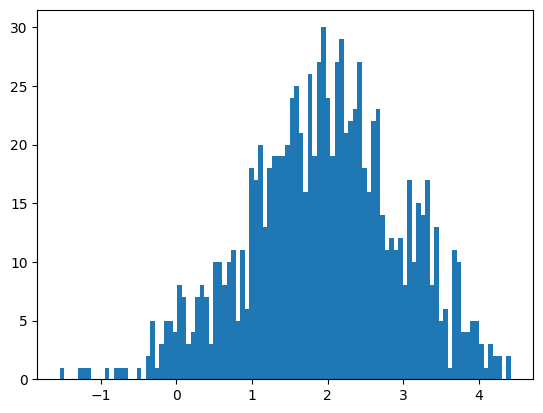

In [14]:
plt.hist(opt.bo_state.y[50000:51000].cpu().numpy(), bins=100)

(array([ 1.,  2.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  2.,  0.,  3.,
         1.,  3.,  1.,  3.,  3.,  3.,  4.,  1.,  3.,  3.,  2.,  9., 10.,
         5.,  7., 15.,  8., 14., 10., 12., 12., 10., 14., 12., 17., 12.,
        16., 20., 19., 18., 17., 17., 17., 15., 16., 22., 26., 18., 21.,
        27., 18., 25., 23., 21., 25., 20., 18., 15., 25., 33., 18., 15.,
        23., 21., 11., 17., 17., 18.,  8., 12., 12., 15.,  6., 11., 10.,
         5.,  8.,  9.,  3.,  6.,  6.,  5.,  3.,  6.,  3.,  5.,  5.,  3.,
         4.,  4.,  0.,  1.,  3.,  2.,  3.,  1.,  3.]),
 array([-1.65543032, -1.59662664, -1.53782308, -1.4790194 , -1.42021573,
        -1.36141205, -1.30260849, -1.24380481, -1.18500113, -1.12619758,
        -1.0673939 , -1.00859022, -0.94978666, -0.89098299, -0.83217937,
        -0.77337569, -0.71457207, -0.65576845, -0.59696484, -0.53816116,
        -0.47935748, -0.42055392, -0.36175025, -0.30294657, -0.24414301,
        -0.18533933, -0.12653565, -0.06773198, -0.00892842,  0.049875

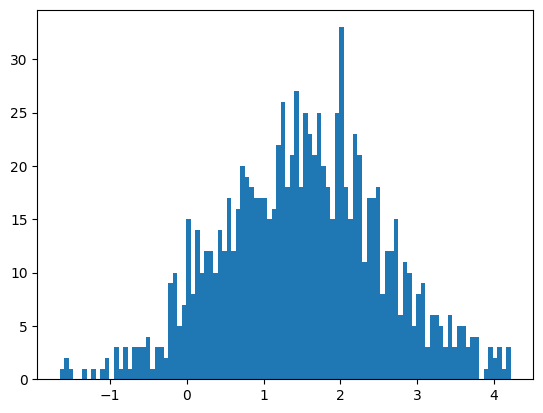

In [15]:
plt.hist(opt.bo_state.y[51000:52000].cpu().numpy(), bins=100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  2.,  2.,  0.,  2.,  0.,  3.,  2.,  1.,  5.,  6.,
         2.,  8.,  1.,  4.,  4.,  4.,  5.,  7.,  9., 12., 13., 13., 13.,
        16., 14., 11., 14., 15., 21.,  8., 18., 17., 18., 24., 24., 28.,
        29., 27., 17., 26., 27., 27., 28., 22., 29., 28., 29., 22., 27.,
        22., 24., 23., 20., 14., 22., 13., 13., 13., 13., 18., 16., 12.,
         8.,  5.,  8.,  8.,  5.,  6.,  6.,  6.,  7.,  5.,  4.,  5.,  2.,
         1.,  5.,  4.,  1.,  2.,  1.,  1.,  0.,  1.]),
 array([-2.74707484, -2.67565989, -2.60424495, -2.53282976, -2.46141481,
        -2.38999987, -2.31858492, -2.24716997, -2.17575502, -2.10434008,
        -2.03292513, -1.96150994, -1.890095  , -1.81868005, -1.7472651 ,
        -1.67585003, -1.60443509, -1.53302014, -1.46160507, -1.39019012,
        -1.31877518, -1.24736011, -1.17594516, -1.10453022, -1.03311515,
        -0.9617002 , -0.89028525, -0.81887031, -0.74745524, -0.676040

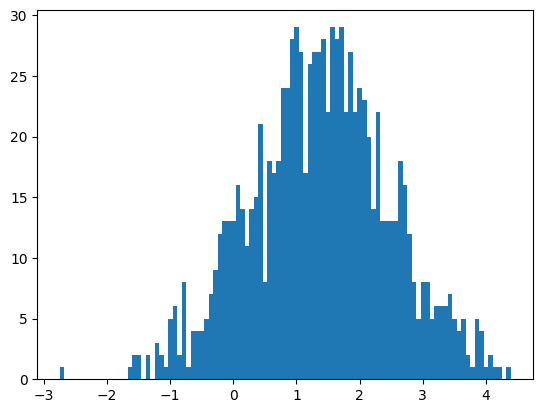

In [16]:
plt.hist(opt.bo_state.y[52000:53000].cpu().numpy(), bins=100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  2.,  1.,
         2.,  2.,  1.,  1.,  7.,  4.,  2.,  6.,  2.,  1.,  5.,  5.,  5.,
         3.,  6.,  8., 12., 11., 11., 15., 12., 16., 16., 18., 22., 18.,
        22., 12., 23., 20., 16., 24., 15., 22., 19., 29., 18., 20., 19.,
        21., 23., 17., 18., 25., 41., 24., 24., 13., 26., 21., 23., 14.,
        22., 19., 16.,  7., 11., 17., 12., 14., 10., 11.,  8., 15.,  7.,
         6.,  7.,  3.,  5.,  7.,  6.,  5.,  7.,  1.,  3.,  6.,  2.,  2.,
         0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.]),
 array([-1.9382385 , -1.87533319, -1.81242788, -1.74952257, -1.68661726,
        -1.62371194, -1.56080675, -1.49790144, -1.43499613, -1.37209082,
        -1.3091855 , -1.24628019, -1.18337488, -1.12046957, -1.05756426,
        -0.99465895, -0.93175364, -0.86884832, -0.80594301, -0.7430377 ,
        -0.68013239, -0.61722708, -0.55432177, -0.49141645, -0.42851126,
        -0.36560595, -0.30270064, -0.23979533, -0.17689002, -0.113984

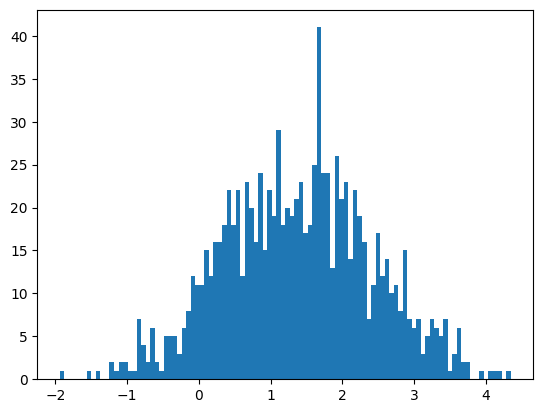

In [17]:
plt.hist(opt.bo_state.y[53000:54000].cpu().numpy(), bins=100)

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  1.,  2.,  0.,  4.,  4.,  0.,  2.,  3.,  5.,  1.,  7.,
         4.,  3.,  6., 11.,  5.,  4.,  5., 11., 10.,  6., 10.,  5., 10.,
        14., 18., 11., 12., 13., 17., 15., 12., 21., 18., 10., 20., 19.,
        18., 23., 21., 15., 30., 21., 19., 26., 29., 27., 23., 30., 19.,
        24., 14., 22., 28., 10., 20., 14., 22., 16., 14., 12., 13., 13.,
         8., 11., 11.,  6.,  9., 11.,  8., 12.,  7.,  9.,  4.,  6.,  3.,
         7.,  6.,  6.,  2.,  8.,  6.,  4.,  2.,  8.]),
 array([-1.98224199, -1.91884005, -1.85543799, -1.79203606, -1.72863412,
        -1.66523218, -1.60183024, -1.53842819, -1.47502625, -1.41162431,
        -1.34822226, -1.28482032, -1.22141838, -1.15801644, -1.09461451,
        -1.03121245, -0.96781051, -0.90440857, -0.84100664, -0.77760458,
        -0.71420264, -0.6508007 , -0.58739865, -0.52399671, -0.46059477,
        -0.39719284, -0.3337909 , -0.27038884, -0.2069869 , -0.143584

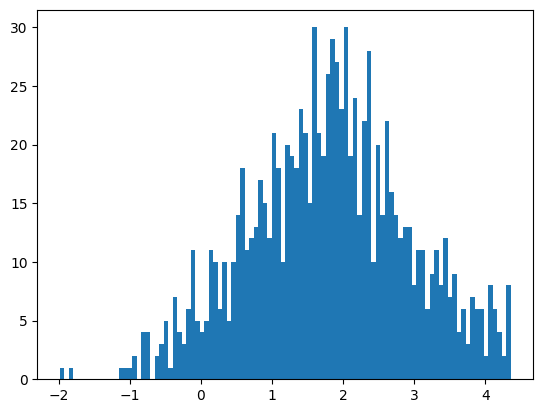

In [18]:
plt.hist(opt.bo_state.y[54000:55000].cpu().numpy(), bins=100)

(array([ 1.,  1.,  0.,  2.,  0.,  1.,  1.,  2.,  0.,  1.,  1.,  1.,  4.,
         0.,  5.,  3.,  3.,  3.,  4.,  3.,  6.,  7.,  5.,  7., 13.,  5.,
         6.,  4.,  5., 13., 12.,  4., 11., 22.,  8., 15., 16., 16.,  8.,
        15., 15., 15., 21., 17., 14., 27., 24., 13., 21., 28., 21., 27.,
        21., 18., 23., 15., 20., 19., 18., 20., 17., 19., 18., 25., 19.,
        18., 15., 18., 12., 16., 11.,  9.,  7., 14., 14.,  8., 10.,  6.,
        10.,  9.,  8.,  7.,  9.,  7., 12.,  8.,  7.,  5.,  5.,  7.,  4.,
         5.,  1.,  2.,  1.,  3.,  0.,  1.,  1.,  1.]),
 array([-1.23122334, -1.17109406, -1.11096478, -1.05083537, -0.99070609,
        -0.9305768 , -0.87044752, -0.81031823, -0.75018889, -0.6900596 ,
        -0.62993026, -0.56980097, -0.50967169, -0.44954234, -0.38941306,
        -0.32928371, -0.26915443, -0.20902514, -0.14889586, -0.08876646,
        -0.02863717,  0.03149211,  0.0916214 ,  0.15175068,  0.21187997,
         0.27200937,  0.33213866,  0.39226794,  0.45239723,  0.512526

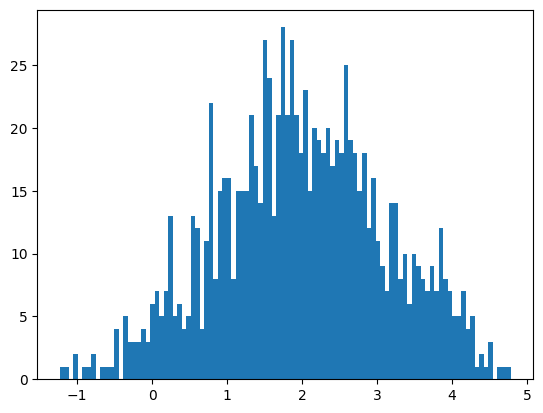

In [19]:
plt.hist(opt.bo_state.y[55000:56000].cpu().numpy(), bins=100)

In [20]:
print(torch.mean(opt.bo_state.y[50000:51000]))
print(torch.mean(opt.bo_state.y[51000:52000]))
print(torch.mean(opt.bo_state.y[52000:53000]))
print(torch.mean(opt.bo_state.y[53000:54000]))
print(torch.mean(opt.bo_state.y[54000:55000]))
print(torch.mean(opt.bo_state.y[55000:56000]))

tensor(1.9539, device='cuda:1')
tensor(1.5161, device='cuda:1')
tensor(1.3749, device='cuda:1')
tensor(1.3848, device='cuda:1')
tensor(1.8037, device='cuda:1')
tensor(1.9908, device='cuda:1')


(array([2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        4.000e+00, 8.000e+00, 7.000e+00, 1.100e+01, 1.100e+01, 1.800e+01,
        1.700e+01, 1.900e+01, 3.000e+01, 3.400e+01, 3.700e+01, 6.000e+01,
        7.500e+01, 6.200e+01, 9.800e+01, 1.190e+02, 1.110e+02, 1.570e+02,
        2.230e+02, 2.300e+02, 3.120e+02, 3.690e+02, 3.860e+02, 4.720e+02,
        5.560e+02, 6.420e+02, 6.700e+02, 7.660e+02, 8.650e+02, 8.900e+02,
        1.034e+03, 1.163e+03, 1.198e+03, 1.250e+03, 1.401e+03, 1.382e+03,
        1.467e+03, 1.546e+03, 1.569e+03, 1.635e+03, 1.611e+03, 1.559e+03,
        1.599e+03, 1.590e+03, 1.573e+03, 1.501e+03, 1.503e+03, 1.482e+03,
        1.361e+03, 1.313e+03, 1.274e+03, 1.189e+03, 1.206e+03, 1.078e+03,
        9.790e+02, 9.310e+02, 8.800e+02, 7.820e+02, 6.660e+02, 6.460e+02,
        5.930e+02, 5.150e+02, 4.630e+02, 4.010e+02, 3.690e+02, 3.250e+02,
        2.720e+02, 2.650e+02, 1.810e+02, 1.620e+02, 1.380e+02, 1.400e+02,
        1.080e+02, 1.040e+02, 8.200e+0

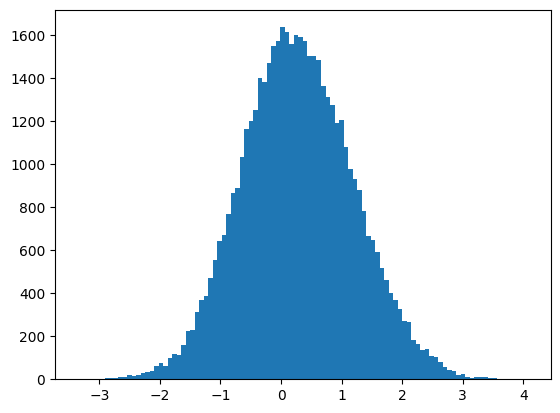

In [21]:
plt.hist(opt.bo_state.y[:50000].cpu().numpy(), bins=100)

In [22]:
print(torch.mean(opt.bo_state.y[:50000]))

tensor(0.2800, device='cuda:1')


In [23]:
print(opt.bo_state.y[:50000].max())

tensor(4.0845, device='cuda:1')


In [24]:
print(opt.bo_state.y[50000:51000].max())
print(opt.bo_state.y[51000:52000].max())
print(opt.bo_state.y[52000:53000].max())
print(opt.bo_state.y[53000:54000].max())
print(opt.bo_state.y[54000:55000].max())
print(opt.bo_state.y[55000:56000].max())

tensor(4.4229, device='cuda:1')
tensor(4.2249, device='cuda:1')
tensor(4.3944, device='cuda:1')
tensor(4.3523, device='cuda:1')
tensor(4.3580, device='cuda:1')
tensor(4.7817, device='cuda:1')
